In [1]:
import glob
import gzip
from sklearn import svm

def getMatrix(root):
    files = glob.glob(root + "/*/*.gz")
    matrix = list()
    for i in files:
        expfile = gzip.open(i)
        matrix.append([])
        for lines in expfile:
            expression = lines.decode("utf-8").rstrip().split()[1]
            matrix[-1].append(float(expression))
        expfile.close()
    return matrix

luadmatrix = getMatrix("luad")
luscmatrix = getMatrix("lusc")

data = luadmatrix + luscmatrix
category = [0] * len(luadmatrix) + [1] * len(luscmatrix)

In [2]:
mysvm = svm.SVC(gamma=0.001)
mysvm.fit(data, category)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

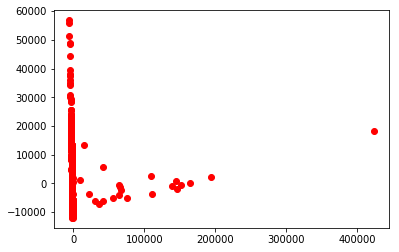

In [5]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2).fit_transform(data)
plt.scatter(pca[:,0], pca[:,1], c='red')

In [6]:
svn2d = svm.SVC(gamma = 0.001)
svn2d.fit(pca, category)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


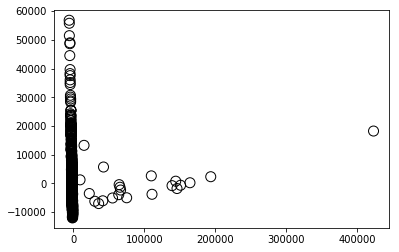

In [12]:
import numpy as np

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svn2d.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svn2d.support_vectors_[:, 0], svn2d.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

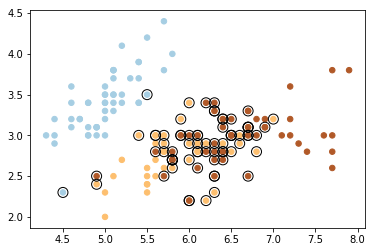

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()